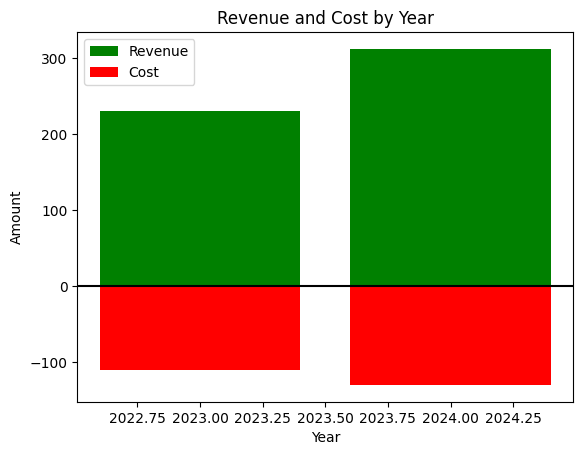

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Year': [2023, 2024],
    'Revenue': [230, 312],
    'Cost': [110, 130]
}

df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots()
ax.bar(df['Year'], df['Revenue'], color='green', label='Revenue')
ax.bar(df['Year'], -df['Cost'], color='red', label='Cost')

# Customize
ax.set_title('Revenue and Cost by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
#ax.set_ylim(-200, 200)  # Adjust y-axis limits
ax.axhline(0, color='black')  # Add x-axis line
ax.get_xticklabels(['2023', '2024'])
ax.legend()

plt.show()

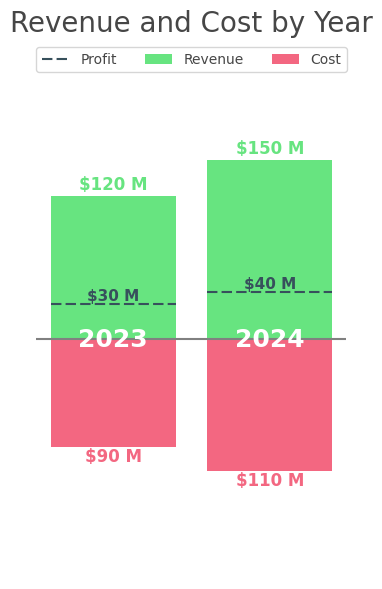

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Year': [2023, 2023, 2024, 2024],
    'Type': ['Revenue', 'Cost', 'Revenue', 'Cost'],
    'Amount': [120, -90, 150, -110],
    'Color': ['#67E480','#F36781','#67E480','#F36781']
}

df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(4,7))
for type, color in [('Revenue', '#67E480'), ('Cost', '#F36781')]:
    mask = df['Type'] == type
    ax.bar(df.loc[mask, 'Year'], df.loc[mask, 'Amount'], color=color, label=type)

# Add value labels
for _, row in df.iterrows():
    ax.text(row['Year'], row['Amount'] + 2 * (row['Amount'] > 0), f'${abs(row["Amount"])} M', ha='center', va='bottom' if row['Amount'] > 0 else 'top', color=row['Color'], weight='semibold', size=12)

# Add dotted lines for profits
for year in set(df['Year']):
    rev = df.loc[(df['Year'] == year) & (df['Type'] == 'Revenue'), 'Amount'].values[0]
    cost = df.loc[(df['Year'] == year) & (df['Type'] == 'Cost'), 'Amount'].values[0]
    profit = rev + cost
    ax.plot([year-0.4, year+0.4], [profit, profit], color='#37505C', linestyle=(0, (5, 2)), linewidth=1.5, label='Profit' if year == min(set(df['Year'])) else None)
    ax.text(year, profit, f'${profit} M', ha='center', va='bottom', color='#37505C', size=11, weight='bold')
    #year
    ax.text(year, 0, f'{year}', ha='center', va='center', color='white', size=18, weight='bold')

# Customize
ax.set_title('Revenue and Cost by Year', color='#464646', size=20)
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.set_ylim(-200, 250)
ax.axhline(0, color='gray')
ax.legend(loc='upper center', ncol=3, labelcolor='#464646')
ax.axis('off')  # Remove axes

plt.show()

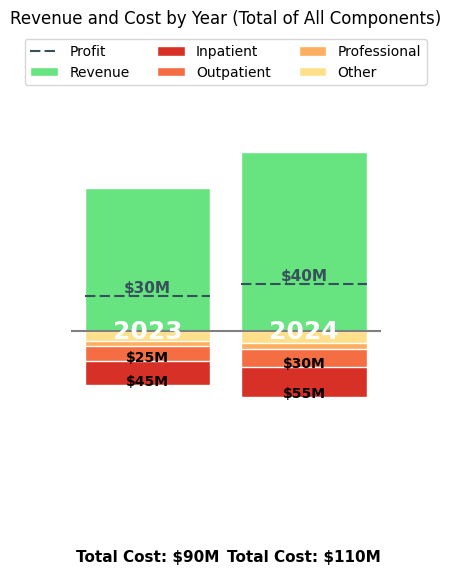

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Year': [2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024],
    'Type': ['Revenue', 'Inpatient', 'Outpatient', 'Professional', 'Other', 
             'Revenue', 'Inpatient', 'Outpatient', 'Professional', 'Other'],
    'Amount': [120, -45, -25, -12, -8, 
               150, -55, -30, -15, -10]  # These sum to original Cost values
}

df = pd.DataFrame(data)

# Define colors
colors = {
    'Revenue': '#67E480', 
    'Inpatient': '#D73027', 
    'Outpatient': '#F46D43', 
    'Professional': '#FDAE61', 
    'Other': '#FEE08B'
}

# Plot
fig, ax = plt.subplots(figsize=(4, 7))
for type, color in colors.items():
    mask = df['Type'] == type
    ax.bar(df.loc[mask, 'Year'], df.loc[mask, 'Amount'], color=color, label=type, edgecolor='white')

# Add value labels only for Inpatient & Outpatient
for _, row in df[df['Type'].isin(['Inpatient', 'Outpatient'])].iterrows():
    ax.text(row['Year'], row['Amount'] + (-3), f'${abs(row["Amount"])}M', 
            ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Calculate and display total cost at the bottom
for year in set(df['Year']):
    total_cost = df.loc[(df['Year'] == year) & (df['Type'] != 'Revenue'), 'Amount'].sum()
    ax.text(year, -195, f'Total Cost: ${abs(total_cost)}M', ha='center', va='bottom', 
            color='black', fontsize=11, fontweight='bold')

# Add dotted lines for profits
for year in set(df['Year']):
    rev = df.loc[(df['Year'] == year) & (df['Type'] == 'Revenue'), 'Amount'].values[0]
    cost = df.loc[(df['Year'] == year) & (df['Type'] != 'Revenue'), 'Amount'].sum()
    profit = rev + cost
    ax.plot([year-0.4, year+0.4], [profit, profit], color='#37505C', linestyle=(0, (5, 2)), linewidth=1.5, label='Profit' if year == min(set(df['Year'])) else None)
    ax.text(year, profit, f'${profit}M', ha='center', va='bottom', color='#37505C', size=11, weight='bold')

# Year Labels
for year in set(df['Year']):
    ax.text(year, 0, f'{year}', ha='center', va='center', color='white', size=18, weight='bold')

# Customize
ax.set_title('Revenue and Cost by Year (Total of All Components)')
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.set_ylim(-200, 250)
ax.axhline(0, color='gray')
ax.legend(loc='upper center', ncol=3)
ax.axis('off')  # Remove axes

plt.show()


# Bullet Bar

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = [
    {'year': 2023, 'mlr_target': 82.2, 'mlr': 80.1},
    {'year': 2024, 'mlr_target': 76.2, 'mlr': 82.3}
]

In [30]:

def vertical_bar_chart(data):
    fig, ax = plt.subplots(figsize=(5, 7))

    # Plot target MLR bars
    for i, item in enumerate(data):
        ax.bar(i, item['mlr_target'], width=0.5, color='#8B9DB0', alpha=0.5)
        target_line, = ax.plot([i-0.3, i+0.3], [item['mlr_target'], item['mlr_target']], color='#DB5461', label='MLR Target')
        #ax.plot([i-0.3, i+0.3], [item['mlr_target'], item['mlr_target']], color='#DB5461', label='MLR Target')
        ax.text(i + 0.4, item['mlr_target'], f"Target:\n{item['mlr_target']:.1f}%", ha='right', va='bottom', color='#DB5461')

    # Plot MLR bars
    mlr_bar = ax.bar(range(len(data)), [item['mlr'] for item in data], width=0.3, color='#002850', label='Current MLR')
    for i, item in enumerate(data):
        #ax.bar(i, item['mlr'], width=0.3, color='#002850', label='Current MLR')
        ax.text(i, item['mlr']/2, f"{item['mlr']:.1f}%", ha='center', va='center', color='white')

    # Customize
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels([str(item['year']) for item in data], fontsize=14)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_ylim(0,100)
    ax.set_frame_on(False)
    ax.set_title('MLR by Year', fontsize=16, color='#464646')
    ax.legend(handles=[mlr_bar, target_line], loc='upper center', ncol=3, labelcolor='#464646')
    plt.show()



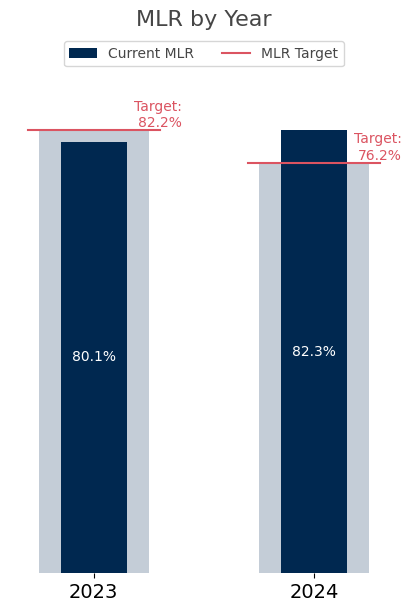

In [31]:

vertical_bar_chart(data)
